# Clusterização da Grande Base

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings

warnings.filterwarnings('ignore') #ou warnings.filterwarnings(action='once')

In [39]:
uri = 'https://raw.githubusercontent.com/ieee-uerj/capes-data-analysis/develop/data/Grande%20Base%203.csv'

df_inicial = pd.read_csv(uri, encoding='latin-1')

## Análises Gerais

In [66]:
df = df_inicial.copy()
df.head()

,CD_PROGRAMA_IES,AN_BASE,CD_AREA_AVALIACAO,CONCEITO_PROGRAMA,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,NM_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,NR_PAGINAS,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,GUS_Do_Homens,GUS_Do_Mulheres,GUS_Do_Brasileiros,GUS_Do_Estrangeiros,GUS_Quantidade_Docentes,AN_NASCIMENTO_DOCENTE,SG_ENTIDADE_ENSINO,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,GUS_pag_por_aluno,CS_STATUS_JURIDICO,AN_NASCIMENTO_DISCENTE,NM_REGIAO,SG_UF_PROGRAMA,CD_CONCEITO_PROGRAMA,Unnamed: 0,NM_MODALIDADE_PROGRAMA,Qtd_Proj,N_PESQUISA,Outros projetos,Qtd_Financiadores,BOLSA,OUTRO AUXÃÂLIO FINANCEIRO,SEM AUXÃÂLIO,PÃÂBLICA_OU_PRIVADA,QTD_FINANCIADORES
0,10001018002P1,2013,9,3,25,10,15,25,0,16,9,0,25,0,23,2,12,8,2,3,0,2,3.0,2.0,TESE,0.0,NaN,0,21,15,10,25,0,25,1967.560000,UNIR,29,48,77,0,13.440000,3.080000,77,0.376623,1.889019,40.761905,NaN,FEDERAL,1981.000000,NORTE,RO,3,0,1,19,17.0,2.0,16,1.0,15.0,0.0,1,3
1,10001018002P1,2014,9,3,22,8,14,22,0,16,6,0,22,0,20,2,12,7,0,3,0,2,3.0,2.0,TESE,1.0,80.0,0,13,14,8,22,0,22,1966.954545,UNIR,26,43,68,1,16.320817,3.136364,69,0.376812,2.193154,31.461538,3.636364,FEDERAL,1983.275362,NORTE,RO,3,3255,1,26,23.0,3.0,20,1.0,19.0,0.0,1,3
2,10001018002P1,2015,9,3,22,8,14,22,0,15,5,2,22,0,20,2,12,9,0,1,0,2,3.0,2.0,TESE,0.0,NaN,0,20,14,8,22,0,22,1971.136364,UNIR,33,57,88,2,13.174747,4.090909,90,0.366667,3.082192,29.200000,NaN,FEDERAL,1984.311111,NORTE,RO,3,6689,1,26,23.0,3.0,19,1.0,18.0,0.0,1,3
3,10001018002P1,2016,9,3,20,7,13,20,0,14,4,2,20,0,18,2,11,8,0,1,0,2,3.0,2.0,TESE,0.0,NaN,0,18,13,7,20,0,20,1972.200000,UNIR,28,53,80,1,14.293827,4.050000,81,0.345679,2.685083,30.166667,NaN,FEDERAL,1986.493827,NORTE,RO,3,10272,1,40,35.0,5.0,32,2.0,30.0,0.0,1,4
4,10001018002P1,2017,9,4,22,8,14,22,0,16,4,2,22,0,20,2,12,9,0,1,0,2,4.0,2.0,TESE,1.0,NaN,0,21,14,8,22,0,22,1973.727273,UNIR,43,64,106,1,13.852167,4.863636,107,0.401869,3.763819,28.428571,NaN,FEDERAL,1987.579439,NORTE,RO,4,14025,1,68,61.0,7.0,58,6.0,52.0,0.0,1,4


In [67]:
df.rename(columns={'OUTRO AUXÃÂLIO FINANCEIRO': 'OUTRO_AUXILIO_FINANCEIRO', 'SEM AUXÃÂLIO': 'SEM_AUXILIO', 'PÃÂBLICA_OU_PRIVADA':'PUBLICA_OU_PRIVADA'}, inplace = True)

## Analisando a variável alvo

In [42]:
df[df['CONCEITO_PROGRAMA'] != 7].describe()

,AN_BASE,CD_AREA_AVALIACAO,CONCEITO_PROGRAMA,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,NR_PAGINAS,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,GUS_Do_Homens,GUS_Do_Mulheres,GUS_Do_Brasileiros,GUS_Do_Estrangeiros,GUS_Quantidade_Docentes,AN_NASCIMENTO_DOCENTE,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,GUS_pag_por_aluno,AN_NASCIMENTO_DISCENTE,CD_CONCEITO_PROGRAMA,Unnamed: 0,NM_MODALIDADE_PROGRAMA,Qtd_Proj,N_PESQUISA,Outros projetos,Qtd_Financiadores,BOLSA,OUTRO_AUXILIO_FINANCEIRO,SEM_AUXILIO,PUBLICA_OU_PRIVADA,QTD_FINANCIADORES
count,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,17910.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19222.000000,19222.000000,17910.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000,19223.000000
mean,2015.662332,26.377985,4.021433,21.783072,9.236644,12.546429,21.188368,0.594704,1.803204,15.246580,4.733288,21.635385,0.147688,18.858763,2.924309,1.121209,16.921344,3.216355,0.356292,0.167768,1.584456,4.025126,2.635125,0.816730,121.469551,0.326692,20.016855,12.546429,9.236644,21.188368,0.594704,21.783072,1966.227946,38.655621,46.907611,84.314103,1.249129,16.673724,3.928086,85.563232,0.445952,2.782187,30.392333,6.346186,1982.901670,4.021433,11120.619102,0.880664,48.239037,44.309213,3.929824,35.986214,17.763825,18.156895,0.065494,0.824377,4.047391
std,1.697176,14.538021,0.942504,9.991124,6.490336,7.375479,9.720924,1.117658,2.869065,10.156366,7.448214,9.933442,0.639039,8.995813,3.416977,1.898824,11.569415,6.253827,1.019801,0.586851,0.492828,0.940479,5.395862,0.386898,47.401419,1.629417,14.555143,7.375479,6.490336,9.720924,1.117658,9.991124,5.060578,36.599828,36.150357,59.767835,3.295254,4.658175,1.905894,60.867929,0.191016,1.974973,6.808843,3.292771,4.247676,0.942504,6340.788024,0.324192,40.062914,37.630277,5.949482,39.330737,24.287429,23.037909,0.806943,0.380509,2.845498
min,2013.000000,1.000000,1.000000,5.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,5.000000,0.000000,5.000000,1944.750000,0.000000,0.000000,1.000000,0.000000,-6.206960,0.090909,1.000000,0.000000,0.027778,1.142857,0.032258,1965.457143,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2014.000000,13.000000,3.000000,15.000000,5.000000,8.000000,15.000000,0.000000,0.000000,10.000000,0.000000,15.000000,0.000000,13.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,1.000000,89.071429,0.000000,11.000000,8.000000,5.000000,15.000000,0.000000,15.000000,1962.730249,17.000000,23.000000,45.000000,0.000000,13.818921,2.590909,46.000000,0.307692,1.683118,25.166667,4.021344,1980.138889,3.000000,5683.500000,1.000000,23.000000,21.000000,0.000000,12.000000,3.000000,4.000000,0.000000,1.000000,2.000000
50%,2016

In [43]:
df[df['CONCEITO_PROGRAMA'] == 7].describe()

,AN_BASE,CD_AREA_AVALIACAO,CONCEITO_PROGRAMA,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,NR_PAGINAS,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,GUS_Do_Homens,GUS_Do_Mulheres,GUS_Do_Brasileiros,GUS_Do_Estrangeiros,GUS_Quantidade_Docentes,AN_NASCIMENTO_DOCENTE,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,GUS_pag_por_aluno,AN_NASCIMENTO_DISCENTE,CD_CONCEITO_PROGRAMA,Unnamed: 0,NM_MODALIDADE_PROGRAMA,Qtd_Proj,N_PESQUISA,Outros projetos,Qtd_Financiadores,BOLSA,OUTRO_AUXILIO_FINANCEIRO,SEM_AUXILIO,PUBLICA_OU_PRIVADA,QTD_FINANCIADORES
count,918.000000,918.000000,918.0,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.0,918.000000,918.000000,888.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,888.000000,918.000000,918.0,918.000000,918.0,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,2015.697168,18.913943,7.0,38.450980,14.263617,24.186275,36.744009,1.706972,2.647059,26.607843,9.196078,38.180828,0.270153,29.772331,8.678649,1.799564,32.754902,2.396514,1.064270,0.435730,1.995643,7.0,1.992375,0.826797,135.209104,3.092593,38.413943,24.186275,14.264706,36.744009,1.706972,38.450980,1963.140047,97.911765,86.315904,177.432462,6.795207,21.861063,5.140273,184.227669,0.493945,4.870379,38.542501,4.358203,1985.001110,7.0,11385.842048,1.0,92.424837,87.491285,4.933551,97.533769,50.571895,46.921569,0.040305,0.936819,5.153595
std,1.736708,13.939901,0.0,19.668831,11.020364,15.599302,18.744358,2.554141,5.405846,19.257901,15.373954,19.511873,0.675964,16.694099,7.482747,2.985812,19.269083,6.256396,2.490814,3.690849,0.065902,0.0,0.087037,0.378629,45.725296,6.434057,20.468416,15.599302,11.020585,18.744358,2.554141,19.668831,4.093188,93.557987,49.535711,113.967832,10.665096,3.591752,2.493992,117.543947,0.187939,3.350322,4.747436,2.403399,3.238162,0.0,6434.732357,0.0,70.905533,68.297168,13.283953,81.338398,53.576032,44.333159,0.254745,0.243421,4.085155
min,2013.000000,1.000000,7.0,11.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.0,1.000000,0.000000,35.000000,0.000000,5.000000,0.000000,0.000000,9.000000,0.000000,11.000000,1945.176471,11.000000,11.000000,38.000000,0.000000,10.378205,1.441176,42.000000,0.119266,0.945295,23.848214,0.857143,1973.768212,7.0,671.000000,1.0,6.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2014.000000,8.000000,7.0,24.000000,7.000000,14.000000,23.000000,0.000000,0.000000,14.000000,0.000000,24.000000,0.000000,18.000000,3.000000,0.000000,20.000000,0.000000,0.000000,0.000000,2.000000,7.0,2.000000,1.000000,105.233553,0.000000,24.000000,14.000000,7.000000,23.000000,0.000000,24.000000,1960.471154,44.250000,52.000000,106.250000,1.000000,19.406680,3.503571,111.000000,0.349360,2.911201,35.285794,2.511942,1983.069937,7.0,5206.500000,1.0,41.000000,40.000000,0.000000,42.000000,13.000000,16.000000,0.000000,1.000000,3.000000
50%,2016.000000,15.000000,7.0,33.500000,11.000000,20.000000,32.000000,1.000000,1.000000,23.000000,2.000000,33.000000,0.000000,26.000000,7.000000,1.000000,28.000000,0.000000,0.000000,0.00

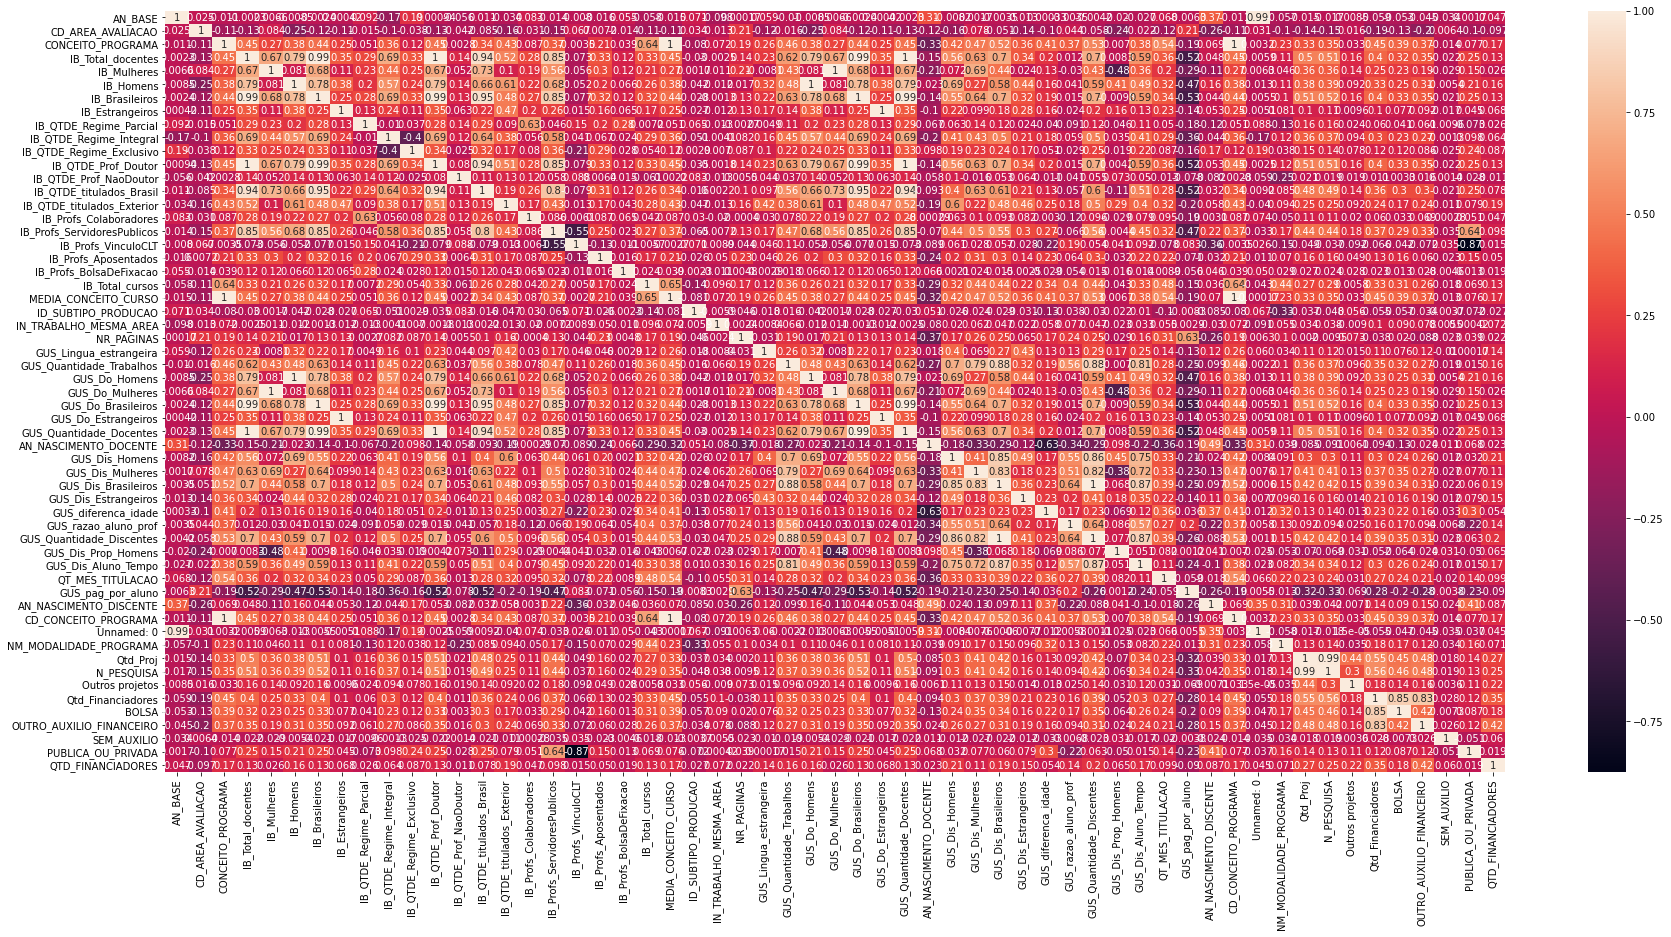

In [44]:
plt.figure(figsize = (30,14))
ax = sns.heatmap(df.corr(), annot = True)
ax = ax

In [45]:
conceito_corr = df.corr()['CONCEITO_PROGRAMA'].to_frame().reset_index()
conceito_corr = conceito_corr[conceito_corr['CONCEITO_PROGRAMA'] < 0.9].sort_values(by = 'CONCEITO_PROGRAMA', ascending = False)

In [46]:
conceito_corr.head(10)

,index,CONCEITO_PROGRAMA
20,IB_Total_cursos,0.642251
42,QT_MES_TITULACAO,0.544655
39,GUS_Quantidade_Discentes,0.528854
35,GUS_Dis_Brasileiros,0.519086
34,GUS_Dis_Mulheres,0.472953
26,GUS_Quantidade_Trabalhos,0.455015
51,Qtd_Financiadores,0.453580
11,IB_QTDE_Prof_Doutor,0.451934
3,IB_Total_docentes,0.449279
31,GUS_Quantidade_Docentes,0.449279


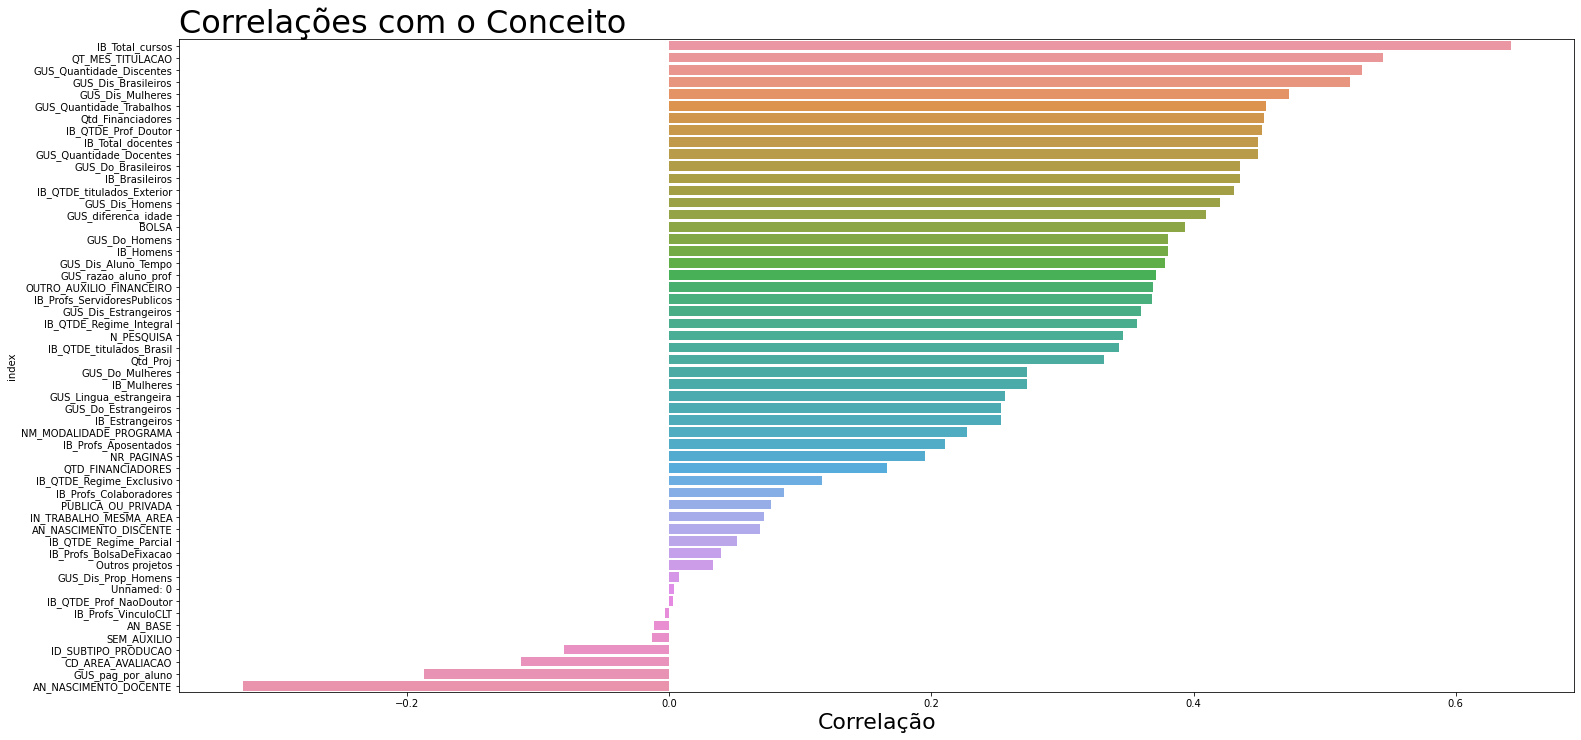

In [47]:
plt.figure(figsize = (25,12))
ax = sns.barplot(data = conceito_corr, y = 'index', x = 'CONCEITO_PROGRAMA')
plt.title("Correlações com o Conceito", fontsize = 32, loc = 'left')
plt.xlabel("Correlação", fontsize = 22)
ax = ax 

In [48]:
conceito_corr['ABS_CONCEITO_PROGRAMA'] = np.abs(conceito_corr['CONCEITO_PROGRAMA'])

In [49]:
conceito_corr = conceito_corr[conceito_corr['CONCEITO_PROGRAMA'] < 0.9].sort_values(by = 'ABS_CONCEITO_PROGRAMA', ascending = False)

In [50]:
features_com_maior_correlacao = list(conceito_corr.head(10)['index'])
features_com_maior_correlacao

['IB_Total_cursos',
 'QT_MES_TITULACAO',
 'GUS_Quantidade_Discentes',
 'GUS_Dis_Brasileiros',
 'GUS_Dis_Mulheres',
 'GUS_Quantidade_Trabalhos',
 'Qtd_Financiadores',
 'IB_QTDE_Prof_Doutor',
 'IB_Total_docentes',
 'GUS_Quantidade_Docentes']

# Clusterização

In [51]:
from sklearn import preprocessing

In [52]:
df.head() 

,CD_PROGRAMA_IES,AN_BASE,CD_AREA_AVALIACAO,CONCEITO_PROGRAMA,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,NM_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,NR_PAGINAS,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,GUS_Do_Homens,GUS_Do_Mulheres,GUS_Do_Brasileiros,GUS_Do_Estrangeiros,GUS_Quantidade_Docentes,AN_NASCIMENTO_DOCENTE,SG_ENTIDADE_ENSINO,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,GUS_pag_por_aluno,CS_STATUS_JURIDICO,AN_NASCIMENTO_DISCENTE,NM_REGIAO,SG_UF_PROGRAMA,CD_CONCEITO_PROGRAMA,Unnamed: 0,NM_MODALIDADE_PROGRAMA,Qtd_Proj,N_PESQUISA,Outros projetos,Qtd_Financiadores,BOLSA,OUTRO_AUXILIO_FINANCEIRO,SEM_AUXILIO,PUBLICA_OU_PRIVADA,QTD_FINANCIADORES
0,10001018002P1,2013,9,3,25,10,15,25,0,16,9,0,25,0,23,2,12,8,2,3,0,2,3.0,2.0,TESE,0.0,NaN,0,21,15,10,25,0,25,1967.560000,UNIR,29,48,77,0,13.440000,3.080000,77,0.376623,1.889019,40.761905,NaN,FEDERAL,1981.000000,NORTE,RO,3,0,1,19,17.0,2.0,16,1.0,15.0,0.0,1,3
1,10001018002P1,2014,9,3,22,8,14,22,0,16,6,0,22,0,20,2,12,7,0,3,0,2,3.0,2.0,TESE,1.0,80.0,0,13,14,8,22,0,22,1966.954545,UNIR,26,43,68,1,16.320817,3.136364,69,0.376812,2.193154,31.461538,3.636364,FEDERAL,1983.275362,NORTE,RO,3,3255,1,26,23.0,3.0,20,1.0,19.0,0.0,1,3
2,10001018002P1,2015,9,3,22,8,14,22,0,15,5,2,22,0,20,2,12,9,0,1,0,2,3.0,2.0,TESE,0.0,NaN,0,20,14,8,22,0,22,1971.136364,UNIR,33,57,88,2,13.174747,4.090909,90,0.366667,3.082192,29.200000,NaN,FEDERAL,1984.311111,NORTE,RO,3,6689,1,26,23.0,3.0,19,1.0,18.0,0.0,1,3
3,10001018002P1,2016,9,3,20,7,13,20,0,14,4,2,20,0,18,2,11,8,0,1,0,2,3.0,2.0,TESE,0.0,NaN,0,18,13,7,20,0,20,1972.200000,UNIR,28,53,80,1,14.293827,4.050000,81,0.345679,2.685083,30.166667,NaN,FEDERAL,1986.493827,NORTE,RO,3,10272,1,40,35.0,5.0,32,2.0,30.0,0.0,1,4
4,10001018002P1,2017,9,4,22,8,14,22,0,16,4,2,22,0,20,2,12,9,0,1,0,2,4.0,2.0,TESE,1.0,NaN,0,21,14,8,22,0,22,1973.727273,UNIR,43,64,106,1,13.852167,4.863636,107,0.401869,3.763819,28.428571,NaN,FEDERAL,1987.579439,NORTE,RO,4,14025,1,68,61.0,7.0,58,6.0,52.0,0.0,1,4


In [68]:
df = df.select_dtypes(exclude = 'object')

In [69]:
scaler = preprocessing.StandardScaler()

np_df = scaler.fit_transform(df)

df = pd.DataFrame(np_df, columns= df.columns).drop(columns = ["NR_PAGINAS", "GUS_pag_por_aluno"])
df = df.dropna()

In [70]:
from sklearn.cluster import KMeans

In [71]:
km = KMeans(n_clusters=3)
km.fit(df)

KMeans(n_clusters=3)

In [72]:
df['labels'] = km.labels_

In [73]:
means = df.groupby('labels').mean()
means.reset_index()

,labels,AN_BASE,CD_AREA_AVALIACAO,CONCEITO_PROGRAMA,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,GUS_Do_Homens,GUS_Do_Mulheres,GUS_Do_Brasileiros,GUS_Do_Estrangeiros,GUS_Quantidade_Docentes,AN_NASCIMENTO_DOCENTE,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,AN_NASCIMENTO_DISCENTE,CD_CONCEITO_PROGRAMA,Unnamed: 0,NM_MODALIDADE_PROGRAMA,Qtd_Proj,N_PESQUISA,Outros projetos,Qtd_Financiadores,BOLSA,OUTRO_AUXILIO_FINANCEIRO,SEM_AUXILIO,PUBLICA_OU_PRIVADA,QTD_FINANCIADORES
0,0,0.020176,0.112968,-0.551163,-0.489314,-0.322827,-0.392861,-0.480810,-0.221968,-0.082839,-0.373808,-0.137824,-0.490981,-0.024328,-0.423941,-0.343359,-0.111580,-0.434865,0.069796,-0.212106,-0.022573,-0.484825,-0.550101,0.067231,-0.059894,-0.156424,-0.440300,-0.392861,-0.322832,-0.480810,-0.221968,-0.489314,0.261697,-0.377294,-0.471250,-0.497327,-0.251157,-0.320449,-0.279713,-0.501012,0.003790,-0.384390,-0.455176,-0.045943,-0.551163,0.018785,-0.203861,-0.345574,-0.352104,-0.087429,-0.361932,-0.312711,-0.296443,0.013762,-0.170888,-0.156425
1,1,-0.067021,-0.396378,1.366421,3.234903,2.036408,2.677818,3.221292,1.096847,0.826136,2.365544,0.950664,3.230624,0.425816,2.957286,1.882479,0.644534,2.628430,0.076576,1.174043,0.304351,0.663918,1.365794,-0.018256,0.027703,1.179933,2.527977,2.677818,2.036550,3.221292,1.096847,3.234903,-0.505473,2.391312,2.281955,2.765073,1.344786,0.474022,0.478713,2.782431,0.245726,2.447720,0.845901,-0.073681,1.366421,-0.056804,0.223971,1.848915,1.876721,0.512493,1.550627,1.231797,1.386939,-0.060077,0.336715,0.528498
2,2,-0.025225,-0.137400,0.740839,0.410502,0.282842,0.319692,0.398154,0.231562,0.035441,0.326504,0.110832,0.413781,-0.012164,0.336777,0.335388,0.104921,0.394944,-0.124260,0.205860,-0.000141,0.717482,0.739167,-0.108477,0.095545,0.113419,0.416294,0.319692,0.282833,0.398154,0.231562,0.410502,-0.369377,0.329171,0.497330,0.481218,0.249306,0.469740,0.402359,0.485165,-0.036395,0.333865,0.646238,0.084388,0.740839,-0.024217,0.308316,0.343216,0.350577,0.081344,0.406629,0.364509,0.318783,-0.015310,0.240217,0.193069


In [74]:
means.std().sort_values(ascending = False)

GUS_Quantidade_Docentes        1.943223
IB_Total_docentes              1.943223
IB_QTDE_Prof_Doutor            1.940942
GUS_Do_Brasileiros             1.934263
IB_Brasileiros                 1.934263
IB_QTDE_titulados_Brasil       1.773812
GUS_Quantidade_Discentes       1.684784
GUS_Dis_Brasileiros            1.674156
GUS_Do_Homens                  1.607149
IB_Homens                      1.607149
IB_Profs_ServidoresPublicos    1.584341
GUS_Quantidade_Trabalhos       1.527723
GUS_Dis_Aluno_Tempo            1.472250
GUS_Dis_Homens                 1.438558
IB_QTDE_Regime_Integral        1.423152
GUS_Dis_Mulheres               1.396613
GUS_Do_Mulheres                1.225360
IB_Mulheres                    1.225277
IB_QTDE_titulados_Exterior     1.140799
N_PESQUISA                     1.139484
Qtd_Proj                       1.122300
CD_CONCEITO_PROGRAMA           0.977902
CONCEITO_PROGRAMA              0.977902
MEDIA_CONCEITO_CURSO           0.976860
Qtd_Financiadores              0.962402


<AxesSubplot:xlabel='PUBLICA_OU_PRIVADA', ylabel='IB_Total_cursos'>

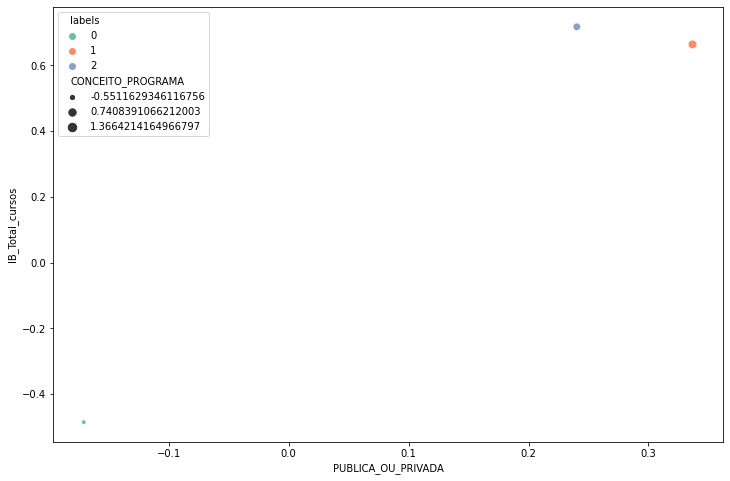

In [75]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = means.reset_index(), x = 'PUBLICA_OU_PRIVADA', y = 'IB_Total_cursos', size='CONCEITO_PROGRAMA',hue = 'labels', palette='Set2')


In [84]:
from sklearn.decomposition import PCA

PCA_func = PCA(n_components=2)
dados_pca = PCA_func.fit_transform(df)

dados_pca = pd.DataFrame(dados_pca)

km_pca = KMeans(n_clusters=3)
km_pca.fit(dados_pca)

dados_pca['labels'] = km_pca.labels_

<AxesSubplot:xlabel='0', ylabel='1'>

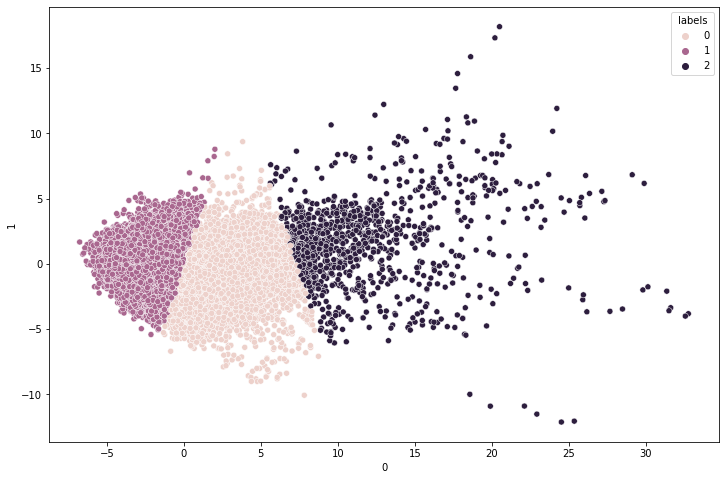

In [85]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = dados_pca, x = 0, y = 1, hue = 'labels')